In [1]:
import numpy
import copy
import time
import random
import matplotlib.pyplot as plt

# Algorithme Edmond-Karp

In [2]:
def construire_graphe(D):
    Liste_arretes=[]
    for x in D:
            for i in range(len(D[x])):
                    Liste_arretes.append([x,D[x][i][0],D[x][i][1]])
    g=DiGraph()
    g.add_edges(Liste_arretes)
    return g

In [3]:
def construire_graphe(D):
    Liste_arretes=[]
    for x in D:
            for i in range(len(D[x])):
                    Liste_arretes.append([x,D[x][i][0],D[x][i][1]])
    g=DiGraph()
    g.add_edges(Liste_arretes)
    return g

In [4]:
def chemin(D,p,s,t,L0):
    if p[t]!=None:
            chemin(D,p,s,p[t],L0)
            L0.append([p[t],t])
    return L0

In [5]:
def initialiser_flot(D):
    D1= copy.deepcopy(D)
    for x in D1:
        for l in D1[x]:
            l[1]=[0,l[1]]
    return D1

In [6]:
def graphe_residuel(D_flot):
    D_graphe_residuel={}
    flot=True
    #verification de contrainte de capacite
    for x in D_flot:
        for l in D_flot[x]:
            if l[1][0]>l[1][1]:
                flot=False
                print(f'le flot sur larrete {(x,l[0])} est plus grand que sa capacite')
    if flot:
        for x in D_flot:
            D_graphe_residuel[x]=[]
        for x in D_flot:
            for l in D_flot[x]:
                reste=l[1][1]-l[1][0]
                if l[1][0]!=0:
                    D_graphe_residuel[l[0]].append([x,l[1][0]])
                if reste >0:
                    D_graphe_residuel[x].append([l[0],reste])
    
    return D_graphe_residuel

In [7]:
def BFS(D,s):
    l=[]
    p=[]
    c=[]
    for v in range(len(D)):
        l.append(9999)
        p.append(None)
        c.append(0)
    l[s]=0
    L=[]
    L.append(s)
    while (len(L)>0):
        v=L[0]
        L.remove(v)
        for k in D[v]:
                j=k[0]
                if c[j]==0:
                    L.append(j)
                    c[j]=1
                    p[j]=v
                    l[j]=l[v]+1
        c[v]=2
    D_BFS={}
    for i in range(len(p)):
        D_BFS[i]=[]
    for i in range(len(p)):
        if p[i]!=None:
            for v in D[p[i]]:
                if v[0]==i:
                    D_BFS[p[i]].append([i,D[p[i]][D[p[i]].index(v)][1]])
    return (p,D_BFS)

In [8]:
def Edmond_karp1(D,s,t):
# Initialisation
    D_flot=initialiser_flot(D) 
    D_gf=graphe_residuel(D_flot)
    p=BFS(D_gf,s)[0]
    D_gf_bfs=BFS(D_gf,s)[1]
    L_chemin=[]
    chemin(D_gf_bfs,p,s,t,L_chemin)
    while(len(L_chemin)!=0):
        global L
        L=[]
# Calcul du flot minimum sur le chemin stocke dans la liste L_chemin
        for x in L_chemin:
            for v in D_gf_bfs[x[0]]: 
                if v[0]==x[1]:
                    L.append(v[1])
                if(len(L)!=0):
                    min_capacite=min(L)
# Amelioration de la valeur du flot        
        for x in L_chemin:
            for v in D_flot[x[0]]:
                if v[0]==x[1]:
                     v[1][0]=v[1][0]+min_capacite
# Recherche d'un chemin dans le graphe residuel du reseau de flot ameliore
        D_gf=graphe_residuel(D_flot)
        p=BFS(D_gf,s)[0]
        D_gf_bfs=BFS(D_gf,s)[1]
        L_chemin=[]
        chemin(D_gf_bfs,p,s,t,L_chemin)
# Valeur du flot max 
    flot_max=0
    for x in D_flot[s]:
        flot_max=flot_max+x[1][0]
    return (L,D_flot,flot_max)

In [9]:
def random_graph(number_vertices,number_edges,min_capacite,max_capacite):
    D={}
    # definition du dictionnaire
    for x in range(number_vertices):
        D[x]=[]
    arrete=0
    #creation d'arrete aleatoire entre sommets
    while(arrete<number_edges):
        sommet_depart=random.randint(0, number_vertices-1)
        sommet_arrive=random.randint(0, number_vertices-1)
        if sommet_depart!=sommet_arrive:
            if [sommet_arrive] not in D[sommet_depart]:
                D[sommet_depart].append([sommet_arrive])
                arrete=arrete+1
    # definition d'une source et puit aleatoire
    s=random.randint(0, number_vertices-1)
    t=random.randint(0, number_vertices-1)
    # aucune arrete n'est incidente a s, et aucune arrete n'est sortante de t
    for x in D:
        for arrete in D[x]:
            if arrete[0]==s:
                D[x].remove(arrete)
    for arrete in D[t]:
        D[t].remove(arrete)
    # poids aleatoires sur les arretes crees
    for x in D:
        for arrete in D[x]:
            poids=random.randint(min_capacite,max_capacite)
            arrete.append(poids)
    return (D,s,t)

In [10]:
def nuage_temps_execution(nb_sommet,nb_min_arrete,nb_max_arrete,pas,min_capacite,max_capacite):
    liste_test=[]
    for j in range(nb_min_arrete,nb_max_arrete,pas):
            graphe=random_graph(nb_sommet,j,min_capacite,max_capacite)[0]
            s=random_graph(nb_sommet,j,min_capacite,max_capacite)[1]
            t=random_graph(nb_sommet,j,min_capacite,max_capacite)[2]
            start_time = time.perf_counter()
            Edmond_karp1(graphe,s,t)
            end_time = time.perf_counter()
            total_time = end_time - start_time
            liste_test.append([i,j,total_time])
    fig = plt.figure()
    ax1 = fig.add_subplot(111)
    sommets=[x[0] for x in liste_test]
    arrete=[x[1] for x in liste_test]
    temps_execution=[x[2] for x in liste_test]
    ax1.scatter(arrete,temps_execution, s=10, c='r')
    plt.show()

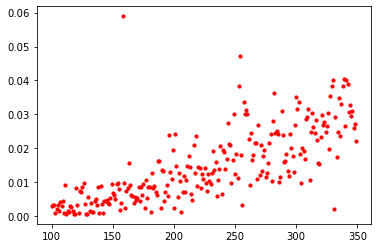

In [28]:
nuage_temps_execution(30,100,350,1,1,100)

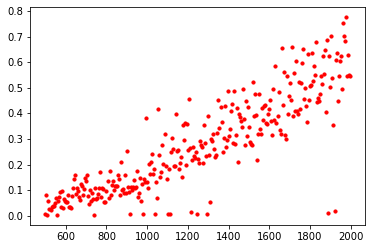

In [29]:
nuage_temps_execution(50,500,2000,5,1,100)

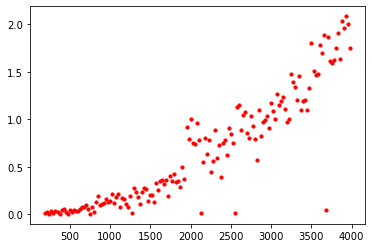

In [30]:
nuage_temps_execution(75,200,4000,25,1,100)

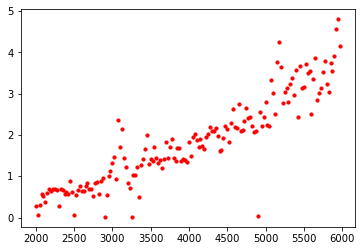

In [32]:
nuage_temps_execution(80,2000,6000,25,1,100)

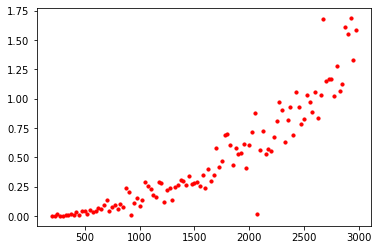

In [38]:
nuage_temps_execution(60,200,3000,25,1,100)

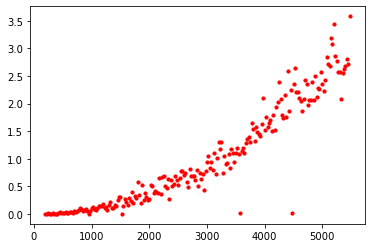

In [39]:
nuage_temps_execution(80,200,5500,25,50,100)

# Exercice 2: sequence de degree

On commence par la modelisation de l'exercice du TD: flot maximum. 

On veut savoir si c'est possible d'avoir un graphe , dont le nombre de sommets est $n$ et chaque sommet $v_i$ avec $ i\in [0,n-1]$ a un nombre de voisins qui vaut $d(v_i)$

Il s'agit de verifier si une sequence de degree $d=(d(v_0),d(v_1),...,d(v_{n-1}))$ est verifie.

On va se ramener au cas general en effectuant une transformation des sommets en les separant en 2, $e_i$ est le sommet correspondant aux arretes incident a $i$


$s_i$ represente le sommet des arretes sortantes de $i$

In [240]:
d = [[3,2],[3,2],[1,2],[1,2]]

In [241]:
def verification_sequence(d):
    nb_sortant=0
    nb_incident=0
    for l in d:
        nb_sortant=nb_sortant+l[0]
        nb_incident=nb_incident+l[1]
        
    if nb_incident == nb_sortant:
        return 0
    return 1

In [242]:
def modelisation_sequence(d):
    if verification_sequence(d) != 0:
        print('les somme des degree entrant est differente de la somme des degree sortant')
    else:
        D_graphe={}
        for i in range(2*len(d)):
            D_graphe[i]=None
    return D_graphe

In [243]:
modelisation_sequence(d)

{0: None, 1: None, 2: None, 3: None, 4: None, 5: None, 6: None, 7: None}

  On transforme le graphe en un graphe biparti $G=((S',A),E)$ avec $S'$ est l'ensemble de sommets apres transformation donc $|S'|=2|S|$

In [244]:
def modelisation_graphe_biparti(d):
    D=modelisation_sequence(d)
    nb_sommet=2*len(d)
    nb_arrete=0
    for j in d:
        nb_arrete=nb_arrete+j[0]+j[1]
    nb_arrete = nb_arrete/2
    D_biparti={}
    for i in range(nb_sommet+nb_arrete):
        D[i]=[]
    s=nb_sommet+nb_arrete
    t=nb_sommet+nb_arrete+1
    D[s]=[]
    D[t]=[]
    for i in range(nb_sommet):
        if i%2==0:
            D[s].append([i,d[i/2][0]])
        else:
            D[s].append([i,d[int(i/2)][1]])
    for i in range(nb_sommet,nb_arrete+ nb_sommet):
        D[i].append([t,2])
    
    for i in range(nb_sommet):
        for j in range(nb_sommet,nb_sommet+nb_arrete+1):
            D[i].append([j,1])
    return D

In [245]:
modelisation_graphe_biparti(d)

{0: [[8, 1],
  [9, 1],
  [10, 1],
  [11, 1],
  [12, 1],
  [13, 1],
  [14, 1],
  [15, 1],
  [16, 1]],
 1: [[8, 1],
  [9, 1],
  [10, 1],
  [11, 1],
  [12, 1],
  [13, 1],
  [14, 1],
  [15, 1],
  [16, 1]],
 2: [[8, 1],
  [9, 1],
  [10, 1],
  [11, 1],
  [12, 1],
  [13, 1],
  [14, 1],
  [15, 1],
  [16, 1]],
 3: [[8, 1],
  [9, 1],
  [10, 1],
  [11, 1],
  [12, 1],
  [13, 1],
  [14, 1],
  [15, 1],
  [16, 1]],
 4: [[8, 1],
  [9, 1],
  [10, 1],
  [11, 1],
  [12, 1],
  [13, 1],
  [14, 1],
  [15, 1],
  [16, 1]],
 5: [[8, 1],
  [9, 1],
  [10, 1],
  [11, 1],
  [12, 1],
  [13, 1],
  [14, 1],
  [15, 1],
  [16, 1]],
 6: [[8, 1],
  [9, 1],
  [10, 1],
  [11, 1],
  [12, 1],
  [13, 1],
  [14, 1],
  [15, 1],
  [16, 1]],
 7: [[8, 1],
  [9, 1],
  [10, 1],
  [11, 1],
  [12, 1],
  [13, 1],
  [14, 1],
  [15, 1],
  [16, 1]],
 8: [[17, 2]],
 9: [[17, 2]],
 10: [[17, 2]],
 11: [[17, 2]],
 12: [[17, 2]],
 13: [[17, 2]],
 14: [[17, 2]],
 15: [[17, 2]],
 16: [[0, 3], [1, 2], [2, 3], [3, 2], [4, 1], [5, 2], [6, 1], [7, 

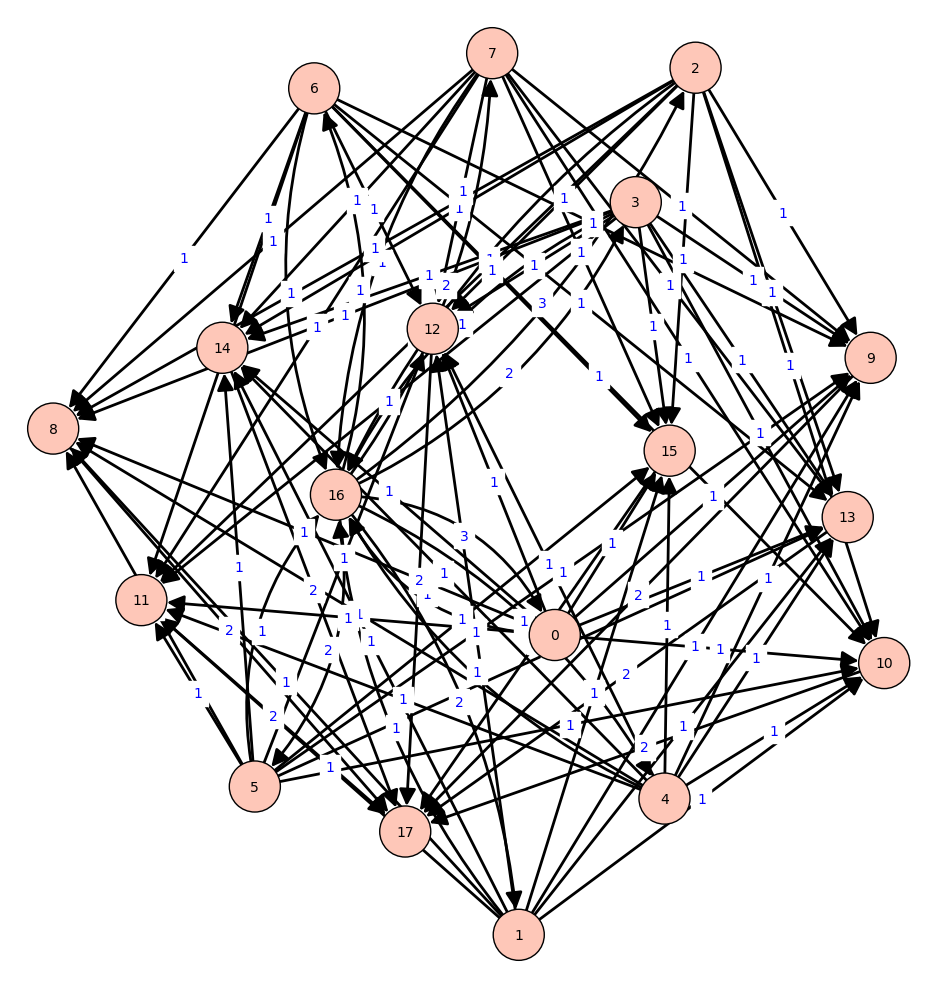

In [246]:
g = construire_graphe(modelisation_graphe_biparti(d))
g.show(figsize=[10,10],edge_labels=True)